LAB 04 19/09/2024

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2

1: Apply following transformation techniques on image provided and observe the output image of each transformation.  

I. Negative transformation 

II. Log transformation

C:\Users\Trung Tin\AppData\Local\Temp\ipykernel_10320\3638825026.py:8: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(image))  # Tính hệ số scale
C:\Users\Trung Tin\AppData\Local\Temp\ipykernel_10320\3638825026.py:8: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(image))  # Tính hệ số scale
C:\Users\Trung Tin\AppData\Local\Temp\ipykernel_10320\3638825026.py:9: RuntimeWarning: divide by zero encountered in log
  log_image = c * np.log(1 + image)    # Áp dụng phép logarit
C:\Users\Trung Tin\AppData\Local\Temp\ipykernel_10320\3638825026.py:9: RuntimeWarning: invalid value encountered in multiply
  log_image = c * np.log(1 + image)    # Áp dụng phép logarit
C:\Users\Trung Tin\AppData\Local\Temp\ipykernel_10320\3638825026.py:10: RuntimeWarning: invalid value encountered in cast
  log_image = np.array(log_image, dtype=np.uint8)  # Chuyển về kiểu uint8


(np.float64(-0.5), np.float64(688.5), np.float64(944.5), np.float64(-0.5))

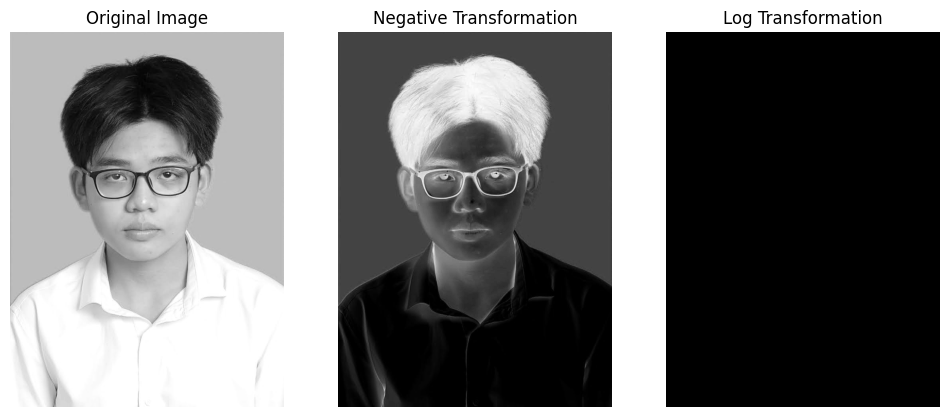

In [25]:
image = plt.imread('C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\image.jpg')
image = cv2.cvtColor (image,cv2.COLOR_BGR2GRAY)

# Biến đổi âm bản
negative_image = 255 - image

# Biến đổi logarit
c = 255 / np.log(1 + np.max(image))  # Tính hệ số scale
log_image = c * np.log(1 + image)    # Áp dụng phép logarit
log_image = np.array(log_image, dtype=np.uint8)  # Chuyển về kiểu uint8

# Hiển thị kết quả
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Negative Transformation")
plt.imshow(negative_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Log Transformation")
plt.imshow(log_image, cmap='gray')
plt.axis('off')

2: Apply the following transformation on an image. 

Pixel values range Output pixel value 

a) 

Less than mean 0 

Greater than mean 255 

b) 

Less than mean 255 

Greater than mean 0 

c) 

±20 mean 0 

Otherwise 255



(np.float64(-0.5), np.float64(688.5), np.float64(944.5), np.float64(-0.5))

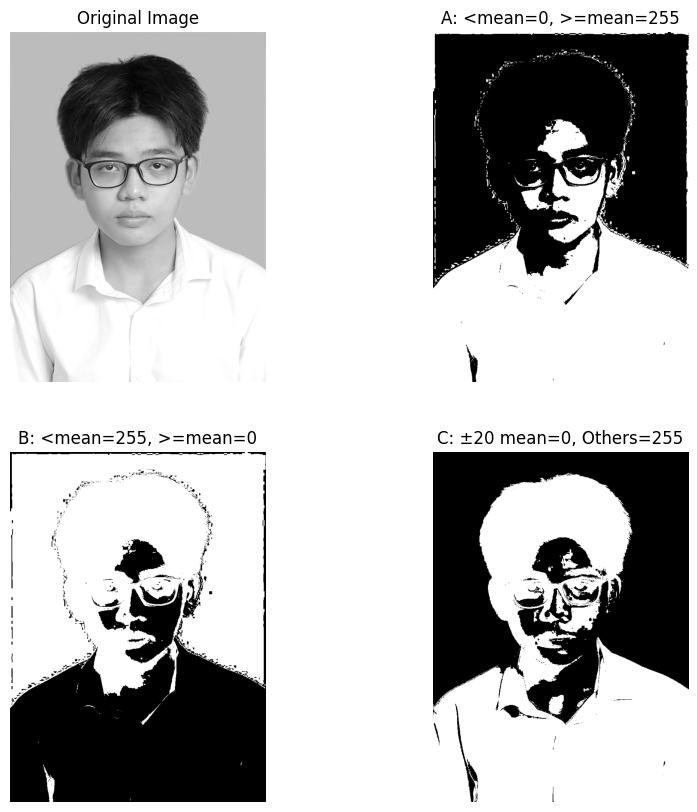

In [3]:
image = plt.imread('C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\image.jpg')
image = cv2.cvtColor (image,cv2.COLOR_BGR2GRAY)

# Tính giá trị trung bình (mean)
mean_value = np.mean(image)

# a) Less than mean → 0, Greater than mean → 255
output_a = np.where(image < mean_value, 0, 255).astype(np.uint8)

# b) Less than mean → 255, Greater than mean → 0
output_b = np.where(image < mean_value, 255, 0).astype(np.uint8)

# c) ±20 mean → 0, Otherwise → 255
output_c = np.where((image >= mean_value - 20) & (image <= mean_value + 20), 0, 255).astype(np.uint8)

# Hiển thị kết quả
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("A: <mean=0, >=mean=255")
plt.imshow(output_a, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("B: <mean=255, >=mean=0")
plt.imshow(output_b, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("C: ±20 mean=0, Others=255")
plt.imshow(output_c, cmap='gray')
plt.axis('off')

3: Apply Power Law transformation for the following values of γ (0.2, 0.5, 1.2 and 1.8) . Make sure to adjust data types accordingly. 

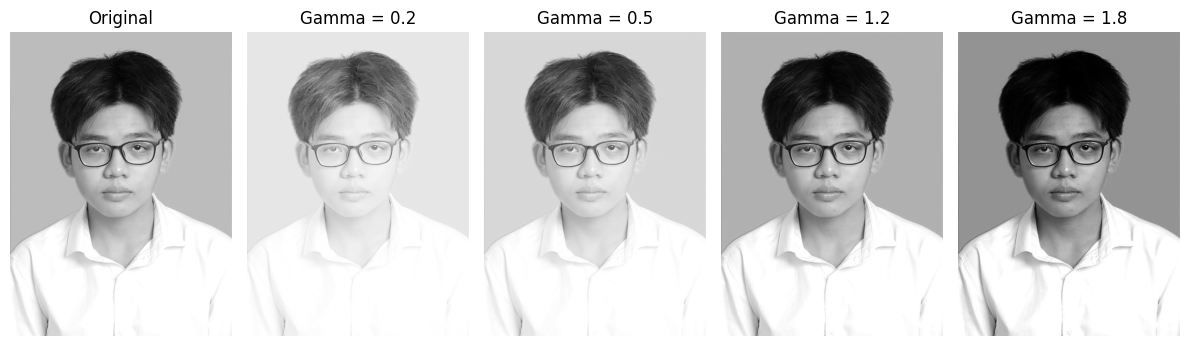

In [30]:
image = plt.imread('C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\image.jpg')
image = cv2.cvtColor (image,cv2.COLOR_BGR2GRAY)

# Các giá trị gamma cần thử
gamma_values = [0.2, 0.5, 1.2, 1.8]

# Hiển thị ảnh gốc
plt.figure(figsize=(12, 8))
plt.subplot(1, len(gamma_values) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

# Áp dụng biến đổi gamma cho từng giá trị gamma
for i, gamma in enumerate(gamma_values):
    # Chuẩn hóa pixel vào khoảng [0, 1]
    normalized = image / 255.0
    # Áp dụng công thức Power Law
    transformed = np.power(normalized, gamma)
    # Đưa pixel về khoảng [0, 255] và chuyển sang kiểu dữ liệu uint8
    output = np.uint8(transformed * 255)

    # Hiển thị kết quả
    plt.subplot(1, len(gamma_values) + 1, i + 2)
    plt.imshow(output, cmap='gray')
    plt.title(f"Gamma = {gamma}")
    plt.axis('off')

plt.tight_layout()
plt.show()

4: Apply Gray level slicing using lower limit 100 and upper limit 200. Set all these values to 210. 

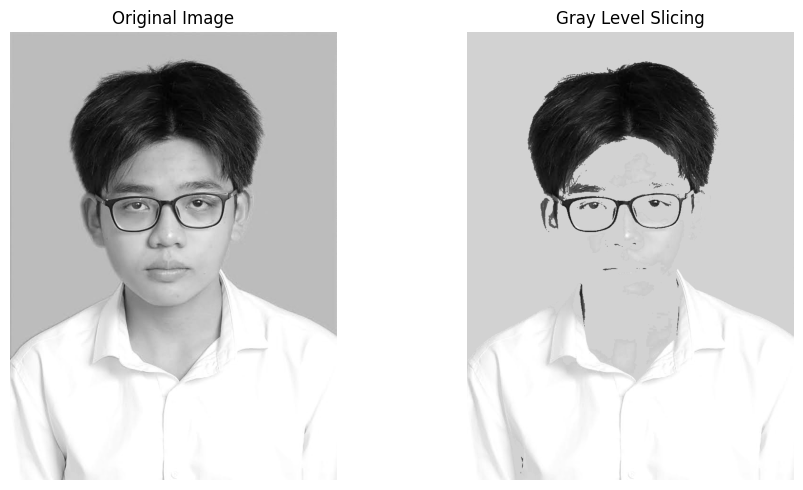

In [31]:
image = plt.imread('C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\image.jpg')
image = cv2.cvtColor (image,cv2.COLOR_BGR2GRAY)

# Tạo bản sao để xử lý
sliced_image = image.copy()

# Đặt ngưỡng dưới và ngưỡng trên
lower_limit = 100
upper_limit = 200

# Áp dụng Gray Level Slicing
sliced_image[(image >= lower_limit) & (image <= upper_limit)] = 210

# Hiển thị ảnh gốc và ảnh sau xử lý
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sliced_image, cmap='gray')
plt.title("Gray Level Slicing")
plt.axis('off')

plt.tight_layout()
plt.show()